Họ và tên: Đặng Văn Minh
MSSV: 19521832

Onemax - POPOP - UX: thực nghiệm giải vấn đề onemax bằng cài đặt POPOP với cài đặt one point crossover

1 - Packages

2 - Code

     - initial_population
     - onemax
     - crossover_UX
     - tournament_selection
     - convergence
     - POPOP_genetic_algorithm
     - pass_10_time
     - upper_bound
     - MRPS
     
3 - Experiments: Bisection - MRPS

    - Probelm size: 10
    - Probelm size: 20
    - Probelm size: 40
    - Probelm size: 80
    - Probelm size: 160

# 1 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 - Code


In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
def onemax(ind):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [4]:
def crossover_UX( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [5]:
pop = initialize_population(2, 10)
print(f'population\n: {pop}')
offstring = crossover_UX(pop)
print(f'offstring\n: {offstring}')

population
: [[0 1 0 1 0 1 1 0 1 0]
 [1 1 1 1 1 0 1 0 1 0]]
offstring
: [[1 1 0 1 0 0 1 0 1 0]
 [0 1 1 1 1 1 1 0 1 0]]


In [6]:
def tournament_selection(parent_population, parent_fitness, population_size, tourament_size):
    
    """
    Hàm thực hiện tournament selection:
    Args: 
        - parent_population: quần thể được sử dụng để chọn ra thế hệ tiếp theo
        - parent_fitness: fitness của những cá thể trong parent_population
        - population_size: kích thước thế hệ tiếp theo
        - tournament_size: kích thước chia parent_population để thược hiện lựa chọn cạnh tranh 
        
    Returns:
        - selected_indices: chỉ số những cá thể được chọn
    
    # vd:   parent_population: có 8 cá thể => len(parent_fitness) = 8
            population_size: chọn 4 cá thể cho thế hệ tiếp theo
            tournament_size: 4
    """
    
    n_tournament = len(parent_population) //tournament_size # 8/4 = 2 -> mỗi lần chia quần thể thành 2 phần bằng nhau
    n_loop = population_size // n_tournament                # 4/2 = 2 -> cần 2 lần chia để chọn đủ 4 cá thể 
    selected_indices = []
    indices = np.arange(len(parent_population))
    
    for i in range(n_loop):
        # Xáo trộn quần thể
        np.random.shuffle(indices)
        
        # xét qua từng tournament
        for tournament in range(n_tournament):
            # lấy điểm bắt đầu tournament
            begin_point = tournament * tournament_size
            
            tournament_indices = indices[begin_point:begin_point+tournament_size]
            # Tìm phần tử có fitness lớn nhất 
            idx_max = np.argmax(parent_fitness[tournament_indices])
            # Thêm cá thể được chọn vào danh sách
            selected_indices.append(tournament_indices[idx_max])
        
    return np.array(selected_indices)

In [7]:
def convergence(pop):
    """
    Convergence when individuals is all the same ==> row is all the same
    Args: 
        - Population: (n_individuals, n_variables)
    Return:
        - True if all inds same else False
        
    vd:  arr = [[0, 1, 1, 0],
                [0, 1, 1, 0]]
        sum(arr) = [0, 2, 2, 0] 
        - phần tử của sum(arr) == 0 or len(arr) ==> hội tụ
        
    """
    n_ind, n_var = pop.shape
    
    # sum all row
    arr = pop.sum(axis=0)
    
    for i in range(n_var):
        if arr[i] != 0 and arr[i] != n_ind:
            return False
    return True

In [8]:
def POPOP_genetic_algorithm(num_individuals, num_parameters, tournament_size):
    
    """
    Args: 
        - num_individuals: số cá thể của quần thể
        - num_parameters: độ dài cá thể 
        - tournament_size: kích thước tournament sử dụng cho tournament selection
    Returns: 
        - is_optimal: 1 nếu tìm được đáp án (cá thể chứa toàn 1) ngược lại 0
        - num_of_evaluations: số lần gọi hàm đánh giá
    """
    
    # Initialize individuals
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([onemax(ind) for ind in pop])
    
    num_of_evaluations = len(pop)
    
    generations = 0
#     print(f'Gen: 0')
#     print(pop_fitness)
    
    while True:
        # check convergence of population
        if convergence(pop) == True: 
            break  
        # if not converge, create new generation
        generations += 1
            
        # Create offstring use crossover, do not use mutation
        offstring = crossover_UX(pop)
        offstring_fitness = np.array([onemax(ind) for ind in offstring])
        num_of_evaluations += len(offstring)
        
        
        # P + O pool
        P_O_pool = np.vstack((pop, offstring))
        P_O_pool_fitness = np.hstack((pop_fitness, offstring_fitness))
        
        # Select parent for next generation
        selected_indices = tournament_selection(P_O_pool, P_O_pool_fitness, num_individuals, tournament_size)
        pop = P_O_pool[selected_indices]
        pop_fitness = P_O_pool_fitness[selected_indices]
        
#         print(f'Gen: {generations}') 
#         print(pop_fitness)
        
#     print('# Final result:')
#     print(pop)
#     print(pop_fitness)
        
    # return 1 if can find optimal solution else 0      
    is_optimal = 0
    if (pop_fitness == num_parameters).all():
        is_optimal = 1
    return is_optimal, num_of_evaluations

In [9]:
# test POPOP_genetic_algorithm
problem_size = 8
population_size = 4
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(population_size, problem_size, tournament_size)

(1, 12)

In [10]:
def pass_10_test(population_size, problem_size, tournament_size, random_seed):
    """
    Chạy 10 lần POPOP_genetic_algorithm với cùng kích thước quần thể và random_seed khác nhau,
    dừng lại khi gặp lần chạy không tìm được có có thể tối ưu
    
    Args: 
        - Population_size
        - problem_size
        - tournament_size
        - random_seed
    Returns:
        - success_10_time: True nếu 10 lần thực hiện POPOP_genetic_algorithm tìm được cá thể tối ưu ngược lại False
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá trong quá trình chạy
    """
    
    success_10_time = True
    num_evaluations = []
    
    # lặp 10 lần với random seed khác nhau  
    for i in range(10):
        
        np.random.seed(random_seed + i)
#         print(f'Lần {i} - random seed {random_seed}')
        
        success, num_evaluation = POPOP_genetic_algorithm(population_size, problem_size, tournament_size)
#         print(f' -- success: {success} \n -- số lần gọi hàm đánh giá: {num_evaluation}')
        
        num_evaluations.append(num_evaluation)
        
        # nếu lần chạy không tìm được cá thể tối ưu thì break
        if success == 0:
#             print("BREAK")
            success_10_time = False
            break
        
    average_number_of_evaluations = np.mean(num_evaluations)
    
    return success_10_time, average_number_of_evaluations

In [11]:
# test pass_10_test
problem_size = 10
population_size = 10
tournament_size = 4
random_seed = 19521832
test, ane = pass_10_test(population_size, problem_size, tournament_size, random_seed)
print(f'success: {test}')
print(f'average_number_of_evaluations: {ane}')

success: False
average_number_of_evaluations: 65.0


In [12]:
# test 10 time with 10 random seed
problem_size = 10
population_size = 24
tournament_size = 4
random_seed = 19521832
test, ane = pass_10_test(population_size, problem_size, tournament_size, random_seed)
print(f'success: {test}')
print(f'average_number_of_evaluations: {ane}')

success: True
average_number_of_evaluations: 177.6


In [13]:
def upper_bound(problem_size, tournament_size, random_seed):
    """
    Tìm cận trên của MRPS
    
    Args: 
        - problem_size: kích thước vấn đề (độ dài một cá thể)
        - tournament_size: khích thược 1 tournament
        - random_seed: random seed bắt đầu, những random seed sau sẽ tự động sét +1 random seed trước
    Returns:
        - success: True nếu tìm thấy N_upper ngược lại False
        - N_upper: cận trên tìm được hoặc -1 nếu không tìm được
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá
    """
    # N_upper vượt quá 8192 sẽ không tìm nữa
    limitted_N_upper = 8192
    N_upper = 4
    success = False
    
    while success == False:
        N_upper *= 2
        
        if N_upper > limitted_N_upper: 
            print(f'N_upper is so big! ==> {limitted_N_upper * 2}')
            break
            
        success, average_number_of_evaluations = pass_10_test(N_upper, problem_size, tournament_size, random_seed)
        
    # if do not seek N_upper <= 8192 return N_upper = -1 
    if success == False:
        N_upper = -1
    return success, N_upper, average_number_of_evaluations

In [14]:
problem_size = 10
tournament_size = 4
random_seed = 19521832
success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
print(f'success: {success}')
print(f'N_upper: {N_upper}')
print(f'average_number_of_evaluations: {average_number_of_evaluations}')

success: True
N_upper: 32
average_number_of_evaluations: 230.4


In [15]:
def MRPS(problem_size, tournament_size, random_seed):
    """
    Thực hiên tìm MRPS bằng bisection
    
    Args:
      - problem_size: 
      - tournament_size:
      - random seed:
    Returns:
     - N_upper: MRPS tìm được
     - average_number_of_evaluations: trung bịnh sô lần gọi hàm đánh giá đối với N_upper trên
    """
    success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
#     print(f'N_upper population size: {N_upper} -- num_of_evas: {average_number_of_evaluations}')
    average_number_of_evaluations_ = average_number_of_evaluations
    
    if success == False:
        return N_upper, average_number_of_evaluations
    
    print(f'-- N_upper: {N_upper}')
    
    N_lower = N_upper/2
    while (N_upper - N_lower)/N_upper > 0.1:
        
        N = int((N_upper + N_lower)/2)
        
        success, average_number_of_evaluations = pass_10_test(N, problem_size, tournament_size, random_seed)
#         print(f'population size: {N} -- num_of_evas: {average_number_of_evaluations} -> {success}')
        
        if success == True:
            average_number_of_evaluations_ = average_number_of_evaluations
            N_upper = N
        else:
            N_lower = N
            
        if (N_upper - N_lower) <= 2:
            break
            
    return N_upper, average_number_of_evaluations_

In [16]:
problem_size = 20
tournament_size = 4
random_seed = 19521832
mrps, evaluations = MRPS(problem_size, tournament_size, random_seed)
print(f'MRPS: {mrps} -- num_of_evas: {evaluations}')

-- N_upper: 64
MRPS: 36 -- num_of_evas: 385.2


# Experiment

In [17]:
# khỏi tạo danh sách lưu lại mrps và evaluation khi chạy bisection qua mỗi problem size
mrps_over_problem_size = {}
evaluations_over_problem_size  = {}

## Problem size - 10

In [19]:
problem_size = 10
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_10'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_10'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 32
-- Minimally required population size: 20
-- Number of evaluation: ------------- 142.0
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 16
-- Minimally required population size: 14
-- Number of evaluation: ------------- 112.0
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 16
-- Minimally required population size: 16
-- Number of evaluation: ------------- 121.6
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 32
-- Minimally required population size: 24
-- Number of evaluation: ------------- 158.4
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 32
-- Minimally required population size: 32
-- Number of evaluation: ------------- 217.6
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 32
-- Minimally required population size: 18
-- Number of evaluation: ------------- 133.2
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 16
-- Minimally req

## Problem size - 20

In [24]:
problem_size = 20
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_20'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_20'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 64
-- Minimally required population size: 36
-- Number of evaluation: ------------- 385.2
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 32
-- Minimally required population size: 30
-- Number of evaluation: ------------- 324.0
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 32
-- Minimally required population size: 28
-- Number of evaluation: ------------- 288.4
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 32
-- Minimally required population size: 24
-- Number of evaluation: ------------- 237.6
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 32
-- Minimally required population size: 28
-- Number of evaluation: ------------- 308.0
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 32
-- Minimally required population size: 28
-- Number of evaluation: ------------- 288.4
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 32
-- Minimally req

## Problem size - 40

In [25]:
problem_size = 40
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_40'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_40'] = evaluations_10_bisection


Bisection 0 - - random seed from 19521832 - 19521842
-- N_upper: 128
-- Minimally required population size: 68
-- Number of evaluation: ------------- 965.6
Bisection 1 - - random seed from 19521842 - 19521852
-- N_upper: 64
-- Minimally required population size: 48
-- Number of evaluation: ------------- 676.8
Bisection 2 - - random seed from 19521852 - 19521862
-- N_upper: 64
-- Minimally required population size: 44
-- Number of evaluation: ------------- 655.6
Bisection 3 - - random seed from 19521862 - 19521872
-- N_upper: 64
-- Minimally required population size: 48
-- Number of evaluation: ------------- 686.4
Bisection 4 - - random seed from 19521872 - 19521882
-- N_upper: 64
-- Minimally required population size: 52
-- Number of evaluation: ------------- 780.0
Bisection 5 - - random seed from 19521882 - 19521892
-- N_upper: 64
-- Minimally required population size: 44
-- Number of evaluation: ------------- 655.6
Bisection 6 - - random seed from 19521892 - 19521902
-- N_upper: 64
-

## Problem size - 80

In [26]:
problem_size = 80
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_80'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_80'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 128
-- Minimally required population size: 96
-- Number of evaluation: ------------- 1958.4
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 128
-- Minimally required population size: 104
-- Number of evaluation: ------------- 2142.4
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 128
-- Minimally required population size: 96
-- Number of evaluation: ------------- 1977.6
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 128
-- Minimally required population size: 88
-- Number of evaluation: ------------- 1812.8
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 128
-- Minimally required population size: 104
-- Number of evaluation: ------------- 2111.2
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 128
-- Minimally required population size: 112
-- Number of evaluation: ------------- 2262.4
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 128


## Problem size - 160

In [27]:
problem_size = 160
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_160'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_160'] = evaluations_10_bisection


Bisection 0
-- N_upper: 256
-- Minimally required population size: 208
-- Number of evaluation: ------------- 5928.0
Bisection 1
-- N_upper: 256
-- Minimally required population size: 240
-- Number of evaluation: ------------- 6792.0
Bisection 2
-- N_upper: 128
-- Minimally required population size: 128
-- Number of evaluation: ------------- 3776.0
Bisection 3
-- N_upper: 256
-- Minimally required population size: 144
-- Number of evaluation: ------------- 4219.2
Bisection 4
-- N_upper: 256
-- Minimally required population size: 176
-- Number of evaluation: ------------- 5068.8
Bisection 5
-- N_upper: 256
-- Minimally required population size: 160
-- Number of evaluation: ------------- 4608.0
Bisection 6
-- N_upper: 256
-- Minimally required population size: 208
-- Number of evaluation: ------------- 5907.2
Bisection 7
-- N_upper: 256
-- Minimally required population size: 160
-- Number of evaluation: ------------- 4592.0
Bisection 8
-- N_upper: 256
-- Minimally required population siz

# Save data

In [28]:
df_mrps = pd.DataFrame(mrps_over_problem_size)
df_mrps.to_csv('experiments/mrps_onemax_UX.csv', index_label='run_time')

df_evaluations = pd.DataFrame(evaluations_over_problem_size)
df_evaluations.to_csv('experiments/evaluations_onemax_UX.csv', index_label='run_time')


# Load data

In [29]:
df_mrps_saved = pd.read_csv('experiments/mrps_onemax_UX.csv', index_col='run_time')
df_evaluations_saved = pd.read_csv('experiments/evaluations_onemax_UX.csv', index_col='run_time')

In [30]:
df_mrps_saved

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
run_time                                                                       
0                      20               36               68               96   
1                      14               30               48              104   
2                      16               28               44               96   
3                      24               24               48               88   
4                      32               28               52              104   
5                      18               28               44              112   
6                      16               22               48               96   
7                      14               36               56              112   
8                      16               28               48               96   
9                      16               30               64              104   

          problem_size_160  
run_time                    
0                      208  
1                      240  
2                      128  
3                      144  
4                      176  
5                      160  
6                      208  
7                      160  
8                      208  
9                      160

In [31]:
df_mrps_saved.describe()

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
count        10.000000        10.000000        10.000000        10.000000   
mean         18.600000        29.000000        52.000000       100.800000   
std           5.581716         4.447221         8.219219         7.728734   
min          14.000000        22.000000        44.000000        88.000000   
25%          16.000000        28.000000        48.000000        96.000000   
50%          16.000000        28.000000        48.000000       100.000000   
75%          19.500000        30.000000        55.000000       104.000000   
max          32.000000        36.000000        68.000000       112.000000   

       problem_size_160  
count         10.000000  
mean         179.200000  
std           35.216158  
min          128.000000  
25%          160.000000  
50%          168.000000  
75%          208.000000  
max          240.000000

In [32]:
df_evaluations_saved

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
run_time                                                                       
0                   142.0            385.2            965.6           1958.4   
1                   112.0            324.0            676.8           2142.4   
2                   121.6            288.4            655.6           1977.6   
3                   158.4            237.6            686.4           1812.8   
4                   217.6            308.0            780.0           2111.2   
5                   133.2            288.4            655.6           2262.4   
6                   121.6            239.8            724.8           1987.2   
7                    89.6            385.2            800.8           2273.6   
8                   123.2            280.0            696.0           1968.0   
9                   113.6            303.0            928.0           2121.6   

          problem_size_160  
run_time                    
0                   5928.0  
1                   6792.0  
2                   3776.0  
3                   4219.2  
4                   5068.8  
5                   4608.0  
6                   5907.2  
7                   4592.0  
8                   5865.6  
9                   4608.0

In [33]:
df_evaluations_saved.describe()

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
count        10.000000        10.000000        10.000000        10.000000   
mean        133.280000       303.960000       756.960000      2061.520000   
std          34.863951        50.768739       111.525056       145.967034   
min          89.600000       237.600000       655.600000      1812.800000   
25%         115.600000       282.100000       679.200000      1970.400000   
50%         122.400000       295.700000       710.400000      2049.200000   
75%         139.800000       320.000000       795.600000      2137.200000   
max         217.600000       385.200000       965.600000      2273.600000   

       problem_size_160  
count         10.000000  
mean        5136.480000  
std          945.445537  
min         3776.000000  
25%         4596.000000  
50%         4838.400000  
75%         5896.800000  
max         6792.000000

In [34]:
mrps_onemax_UX = df_mrps_saved.to_numpy()
evaluations_onemax_UX = df_evaluations_saved.to_numpy()

In [35]:
# create values for visualize
problem_sizes = [10, 20, 40, 80, 160]

mrps_mean = mrps_onemax_UX.mean(axis=0)

mrps_std = mrps_onemax_UX.std(axis=0)

evaluations_mean = evaluations_onemax_UX.mean(axis=0)

evaluations_std = evaluations_onemax_UX.std(axis=0)

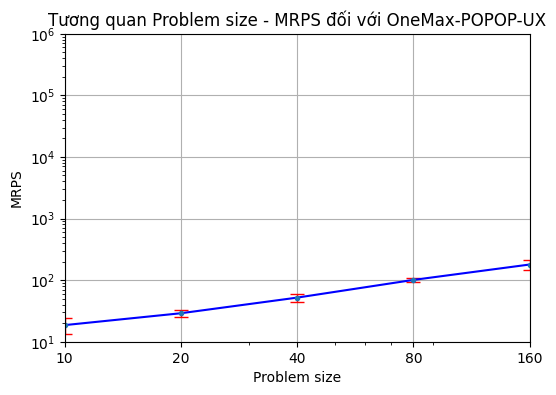

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

# plots
ax.errorbar(problem_sizes, mrps_mean, yerr=mrps_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, mrps_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan Problem size - MRPS đối với OneMax-POPOP-UX')

#set x_axis
ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

# set y_axis
ax.set_yscale('log')
ax.set_ylabel('MRPS')

plt.show()

In [37]:
fig.savefig('graphs/Problem size - MRPS - OneMax-POPOP-UX.png')

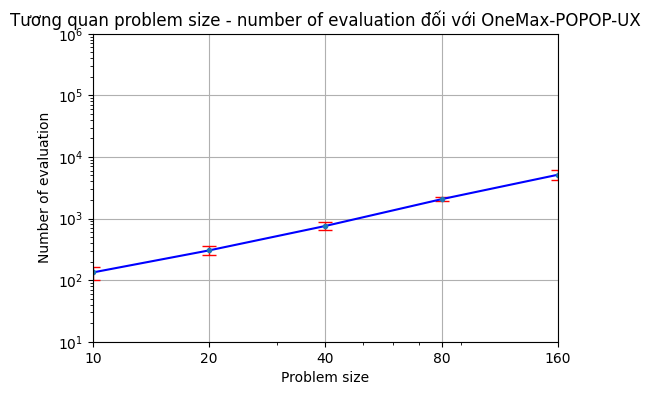

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(problem_sizes, evaluations_mean, yerr=evaluations_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, evaluations_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan problem size - number of evaluation đối với OneMax-POPOP-UX')

ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

ax.set_ylabel('Number of evaluation')
ax.set_yscale('log')

plt.show()

In [39]:
fig.savefig('graphs/problem size - number of evaluation - OneMax-POPOP-UX.png')